In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Read data

In [3]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [4]:
df.head(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,0,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,1,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,0,29.5,20.5,25.016667,79.0,41.0,23,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,0,28.0,19.9,23.925000,78.0,44.0,43,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,0,30.4,19.7,24.229167,74.0,30.0,49,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,0,30.5,19.6,24.579167,68.0,28.0,39,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,0,32.6,20.6,25.887500,73.0,33.0,19,NaN,NaN,51.0,NaN,82.0


In [5]:
df.tail(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1816,2019-12-22,Sun,6,51,12,1,0,0,32.9,20.3,26.037500,84.0,34.0,34,0.0,14.0,NaN,7.0,NaN
1817,2019-12-23,Mon,0,52,12,0,0,0,25.9,19.0,22.291667,91.0,59.0,47,NaN,14.0,NaN,7.0,NaN
1818,2019-12-24,Tue,1,52,12,0,0,0,24.6,17.6,21.175000,91.0,65.0,37,NaN,13.0,NaN,6.0,NaN
1819,2019-12-25,Wed,2,52,12,0,1,0,30.3,17.4,23.525000,91.0,36.0,59,NaN,8.0,NaN,6.0,NaN
1820,2019-12-26,Thu,3,52,12,0,0,1,30.4,20.8,25.000000,79.0,37.0,71,NaN,9.0,NaN,5.0,NaN
1821,2019-12-27,Fri,4,52,12,0,0,0,29.1,19.9,24.016667,83.0,40.0,48,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,0,28.6,19.7,23.245833,88.0,44.0,39,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,0,29.4,18.8,22.333333,90.0,40.0,36,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,0,29.3,18.1,22.958333,84.0,32.0,41,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,0,29.9,18.8,24.045833,79.0,37.0,49,NaN,8.0,NaN,5.0,NaN


In [6]:
df.count()

Date                 1826
DayOfWeek            1826
DayOfWeekNum         1826
WeekOfYear           1826
Month                1826
IsWeekend            1826
IsHoliday            1826
IsDayAfterHoliday    1826
temp_max             1826
temp_min             1826
temp_mean            1826
humidity_max         1826
humidity_min         1826
NUMBER_INT           1826
CO                   1581
MP10                 1457
O3                   1265
MP2.5                1195
SO2                  1091
dtype: int64

### Set features

In [7]:
selected_cols_final = [
    'Date',
    'DayOfWeekNum',
    'WeekOfYear',
    'Month',
    'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    'CO',
    'temp_max',
    'temp_min',
    'humidity_max',
]

df_final = df[selected_cols_final].copy()

In [8]:
# add lag

df_final['CO_lag1'] = df_final['CO'].shift(1)
df_final['CO_lag2'] = df_final['CO'].shift(2)
df_final['CO_lag3'] = df_final['CO'].shift(3)

df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
# df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [9]:
df_final = df_final.dropna()

In [10]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 3 to 1752
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1417 non-null   object 
 1   DayOfWeekNum   1417 non-null   int64  
 2   WeekOfYear     1417 non-null   int64  
 3   Month          1417 non-null   int64  
 4   IsWeekend      1417 non-null   int64  
 5   IsHoliday      1417 non-null   int64  
 6   NUMBER_INT     1417 non-null   int64  
 7   CO             1417 non-null   float64
 8   temp_max       1417 non-null   float64
 9   temp_min       1417 non-null   float64
 10  humidity_max   1417 non-null   float64
 11  CO_lag1        1417 non-null   float64
 12  CO_lag2        1417 non-null   float64
 13  CO_lag3        1417 non-null   float64
 14  temp_min_lag1  1417 non-null   float64
 15  temp_min_lag2  1417 non-null   float64
 16  temp_min_lag3  1417 non-null   float64
dtypes: float64(10), int64(6), object(1)
memory usage: 199.3+ 

,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,CO,temp_max,temp_min,humidity_max,CO_lag1,CO_lag2,CO_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
count,1417,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000
unique,1417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.988709,26.155963,6.416373,0.286521,0.023289,47.647142,0.383910,28.321948,17.719831,82.171489,0.388144,0.391673,0.391673,17.707763,17.699294,17.689908
std,NaN,2.008777,14.377000,3.292083,0.452295,0.150872,15.924424,0.489403,2.972889,2.673525,9.390738,0.490388,0.491181,0.491181,2.668110,2.679615,2.690195
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,0.000000,17.800000,7.300000,42.000000,0.000000,0.000000,0.000000,7.300000,7.300000,7.300000
25%,NaN,1.000000,14.000000,4.000000,0.000000,0.000000,36.000000,0.000000,26.400000,16.000000,76.000000,0.000000,0.000000,0.000000,16.000000,16.000000,16.000000
50%,NaN,3.000000,26.000000,7.000000,0.000000,0.000000,46.000000,0.000000,28.500000,18.300000,84.000000,0.000000,0.000000,0.000000,18.300000,18.200000,18.200000
75%,NaN,5.000000,38.000000,9.000000,1.000000,0.000000,59.000000,1.000000,30.400000,19.600000,90.000000,1.000000,1.000000,1.000000,19.600000,19.600000,19.600000


In [11]:
df_final.dtypes

Date              object
DayOfWeekNum       int64
WeekOfYear         int64
Month              int64
IsWeekend          int64
IsHoliday          int64
NUMBER_INT         int64
CO               float64
temp_max         float64
temp_min         float64
humidity_max     float64
CO_lag1          float64
CO_lag2          float64
CO_lag3          float64
temp_min_lag1    float64
temp_min_lag2    float64
temp_min_lag3    float64
dtype: object

## Train

In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
# df_final = df_final.sort_values(by='Date')

# remove the last 5 days (account for lag ...)
# df_final = df_final[:-5]

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)



df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,CO,temp_max,temp_min,humidity_max,CO_lag1,CO_lag2,CO_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
3,6,1,1,1,0,20,0.0,30.6,22.2,81.0,0.0,0.0,0.0,20.2,21.0,20.6
4,0,2,1,0,0,51,0.0,30.8,20.8,79.0,0.0,0.0,0.0,22.2,20.2,21.0
5,1,2,1,0,0,23,0.0,29.5,20.5,79.0,0.0,0.0,0.0,20.8,22.2,20.2
6,2,2,1,0,0,43,0.0,28.0,19.9,78.0,0.0,0.0,0.0,20.5,20.8,22.2
18,0,4,1,0,0,37,0.0,32.6,21.2,61.0,0.0,0.0,0.0,18.5,20.4,20.9


In [14]:
df_train.tail()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,CO,temp_max,temp_min,humidity_max,CO_lag1,CO_lag2,CO_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1456,3,52,12,0,0,60,1.0,24.8,18.8,92.0,1.0,1.0,1.0,18.6,18.5,18.5
1457,4,52,12,0,0,61,1.0,25.4,18.5,92.0,1.0,1.0,1.0,18.8,18.6,18.5
1458,5,52,12,1,0,30,1.0,27.5,17.7,92.0,1.0,1.0,1.0,18.5,18.8,18.6
1459,6,52,12,1,0,26,1.0,27.3,18.5,93.0,1.0,1.0,1.0,17.7,18.5,18.8
1460,0,1,12,0,0,61,1.0,25.9,19.2,92.0,1.0,1.0,1.0,18.5,17.7,18.5


In [15]:
df_val.head(10)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,CO,temp_max,temp_min,humidity_max,CO_lag1,CO_lag2,CO_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1461,1,1,1,0,1,44,1.0,27.9,19.2,92.0,1.0,1.0,1.0,19.2,18.5,17.7
1462,2,1,1,0,0,45,1.0,31.1,18.9,90.0,1.0,1.0,1.0,19.2,19.2,18.5
1463,3,1,1,0,0,28,1.0,30.7,20.4,88.0,1.0,1.0,1.0,18.9,19.2,19.2
1464,4,1,1,0,0,37,1.0,25.4,19.0,91.0,1.0,1.0,1.0,20.4,18.9,19.2
1465,5,1,1,1,0,36,1.0,30.1,18.6,91.0,1.0,1.0,1.0,19.0,20.4,18.9
1466,6,1,1,1,0,30,1.0,31.8,18.8,90.0,1.0,1.0,1.0,18.6,19.0,20.4
1467,0,2,1,0,0,37,1.0,31.2,20.9,79.0,1.0,1.0,1.0,18.8,18.6,19.0
1468,1,2,1,0,0,39,1.0,29.6,19.7,87.0,1.0,1.0,1.0,20.9,18.8,18.6
1469,2,2,1,0,0,49,1.0,29.4,19.0,78.0,1.0,1.0,1.0,19.7,20.9,18.8
1470,3,2,1,0,0,51,1.0,29.2,19.7,75.0,1.0,1.0,1.0,19.0,19.7,20.9


In [16]:
df_val.tail(20)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,CO,temp_max,temp_min,humidity_max,CO_lag1,CO_lag2,CO_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1707,2,36,9,0,0,62,0.0,33.7,20.6,59.0,0.0,0.0,0.0,19.8,19.1,16.8
1708,3,36,9,0,0,77,0.0,30.1,17.9,70.0,0.0,0.0,0.0,20.6,19.8,19.1
1709,4,36,9,0,0,46,0.0,26.1,18.8,75.0,0.0,0.0,0.0,17.9,20.6,19.8
1710,5,36,9,1,1,45,0.0,29.2,16.7,78.0,0.0,0.0,0.0,18.8,17.9,20.6
1711,6,36,9,1,0,28,0.0,27.5,17.2,75.0,0.0,0.0,0.0,16.7,18.8,17.9
1712,0,37,9,0,0,62,0.0,28.2,15.9,72.0,0.0,0.0,0.0,17.2,16.7,18.8
1713,1,37,9,0,0,42,0.0,33.6,18.0,63.0,0.0,0.0,0.0,15.9,17.2,16.7
1714,2,37,9,0,0,51,0.0,34.6,18.1,73.0,0.0,0.0,0.0,18.0,15.9,17.2
1715,3,37,9,0,0,45,0.0,35.4,19.2,68.0,0.0,0.0,0.0,18.1,18.0,15.9
1716,4,37,9,0,0,48,0.0,36.4,21.2,57.0,0.0,0.0,0.0,19.2,18.1,18.0


## Test (10x with cv)

In [17]:
results = []
results30 = []

param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
}

In [18]:
for i in range(10):
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nRun {i+1} Best Hyperparameters:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.4f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics 1y
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    # Metrics 30d
    y_pred_30d = best_xgb_model.predict(X_val[:30])
    y_val_30 = y_val[:30]
    mse_30d = mean_squared_error(y_val_30, y_pred_30d)
    rmse_30d = np.sqrt(mse_30d)
    mae_30d = mean_absolute_error(y_val_30, y_pred_30d)
    mape_val_30d = mape(y_val_30, y_pred_30d)
    smape_val_30d = smape(y_val_30, y_pred_30d)
    r2_30d = r2_score(y_val_30, y_pred_30d)
    corr_30d = np.corrcoef(y_val_30, y_pred_30d)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })

    results30.append({
        'run': i+1,
        'random_state': i,
        'MSE_30d': mse_30d,
        'RMSE_30d': rmse_30d,
        'MAE_30d': mae_30d,
        'MAPE_30d': mape_val_30d,
        'sMAPE_30d': smape_val_30d,
        'R2_30d': r2_30d,
        'Correlation_30d': corr_30d
    })




Run 1 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 160}
Best R-squared: 0.5665

Run 2 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 100}
Best R-squared: 0.5688

Run 3 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 60}
Best R-squared: 0.5682

Run 4 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 160}
Best R-squared: 0.5673

Run 5 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 120}
Best R-squared: 0.5700

Run 6 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 140}
Best R-squared: 0.5679

Run 7 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 100}
Best R-squared: 0.5692

Run 8 Best Hyperparameters:
Best Hyperpar

### Results 1y

In [19]:
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,136.706169,11.692141,9.037205,16.652437,18.248750,0.474875,0.804755,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.566531
1,2,1,136.367945,11.677669,8.969695,16.499058,18.114973,0.476174,0.807678,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.568834
2,3,2,137.243465,11.715096,8.950270,16.479862,18.105634,0.472811,0.803470,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.568226
3,4,3,136.492951,11.683020,8.996964,16.574466,18.190280,0.475694,0.806079,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.567308
4,5,4,135.289447,11.631399,8.965796,16.541023,18.124268,0.480317,0.806720,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.569954
5,6,5,137.807550,11.739146,9.049961,16.702327,18.348374,0.470644,0.804824,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.567892
6,7,6,135.850705,11.655501,8.980454,16.559158,18.149028,0.478161,0.806428,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.569169
7,8,7,135.634876,11.646239,8.968523,16.534621,18.114324,0.478990,0.804493,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.570011
8,9,8,135.817322,11.654069,8.970916,16.526318,18.146906,0.478289,0.808632,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.566529
9,10,9,136.546181,11.685298,9.026248,16.645354,18.267134,0.475489,0.806942,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.569034


In [20]:
results_df.describe()

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Cross-validated R-squared
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,136.375661,11.677958,8.991603,16.571463,18.180967,0.476144,0.806002,0.568349
std,3.02765,3.02765,0.765322,0.032749,0.034405,0.072463,0.081648,0.002940,0.001597,0.001275
min,1.00000,0.00000,135.289447,11.631399,8.950270,16.479862,18.105634,0.470644,0.803470,0.566529
25%,3.25000,2.25000,135.825668,11.654427,8.968816,16.528394,18.117297,0.475028,0.804772,0.567454
50%,5.50000,4.50000,136.430448,11.680344,8.975685,16.550091,18.147967,0.475934,0.806253,0.568530
75%,7.75000,6.75000,136.666172,11.690430,9.018927,16.627632,18.234133,0.478257,0.806886,0.569135
max,10.00000,9.00000,137.807550,11.739146,9.049961,16.702327,18.348374,0.480317,0.808632,0.570011


### results 30d

In [21]:
results_df_30 = pd.DataFrame(results30)
results_df_30

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
0,1,0,80.964359,8.998020,7.545306,18.864175,21.228488,-0.209205,0.667453
1,2,1,76.356836,8.738240,7.420535,18.715751,20.992501,-0.140392,0.693384
2,3,2,81.993011,9.054999,7.565157,19.019648,21.500093,-0.224568,0.672351
3,4,3,81.361300,9.020050,7.619219,19.152411,21.554740,-0.215134,0.674402
4,5,4,76.649447,8.754967,7.449489,18.865581,21.120260,-0.144762,0.680084
5,6,5,80.989625,8.999424,7.564739,19.005541,21.422458,-0.209583,0.678542
6,7,6,78.255015,8.846186,7.457115,18.748821,21.067884,-0.168741,0.681991
7,8,7,82.536329,9.084951,7.566346,18.978394,21.397705,-0.232683,0.662966
8,9,8,79.256592,8.902617,7.433804,18.701613,21.096971,-0.183700,0.683115
9,10,9,81.351647,9.019515,7.612244,19.089068,21.464733,-0.214989,0.665921


In [22]:
results_df_30.describe()

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,79.971416,8.941897,7.523395,18.914100,21.284583,-0.194376,0.676021
std,3.02765,3.02765,2.213163,0.124262,0.075510,0.159059,0.205833,0.033054,0.009263
min,1.00000,0.00000,76.356836,8.738240,7.420535,18.701613,20.992501,-0.232683,0.662966
25%,3.25000,2.25000,78.505409,8.860294,7.451396,18.777659,21.102793,-0.215098,0.668678
50%,5.50000,4.50000,80.976992,8.998722,7.555023,18.921987,21.313096,-0.209394,0.676472
75%,7.75000,6.75000,81.358887,9.019916,7.566048,19.016121,21.454164,-0.172481,0.681514
max,10.00000,9.00000,82.536329,9.084951,7.619219,19.152411,21.554740,-0.140392,0.693384


## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = RandomForestRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 5 with RMSE = 11.63
Best parameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 120}


### 1y

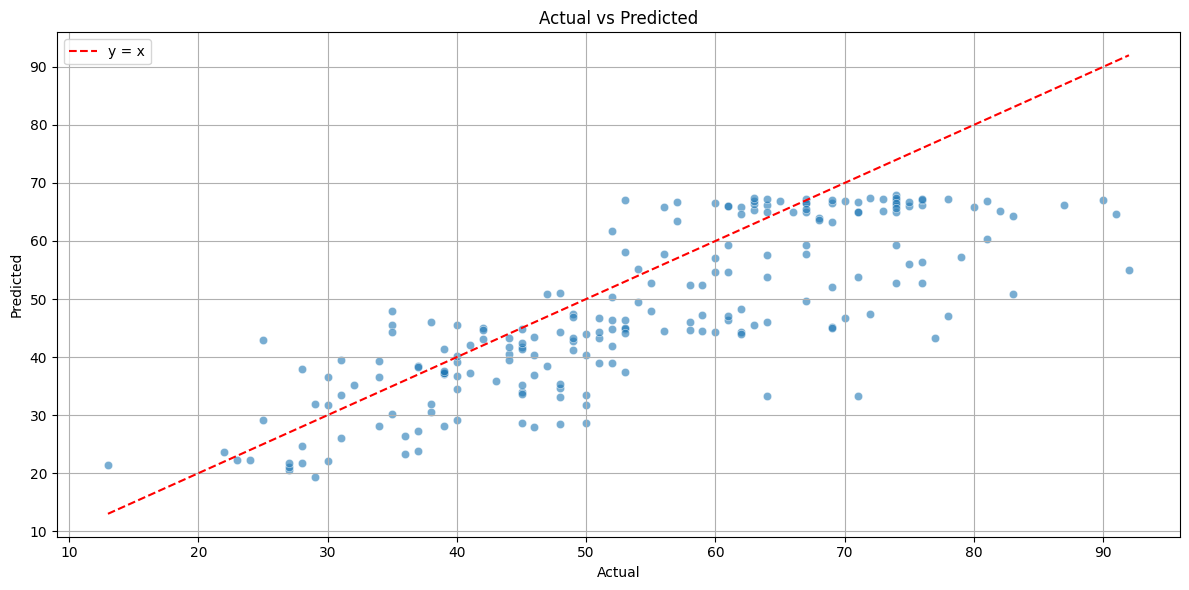

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:], y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

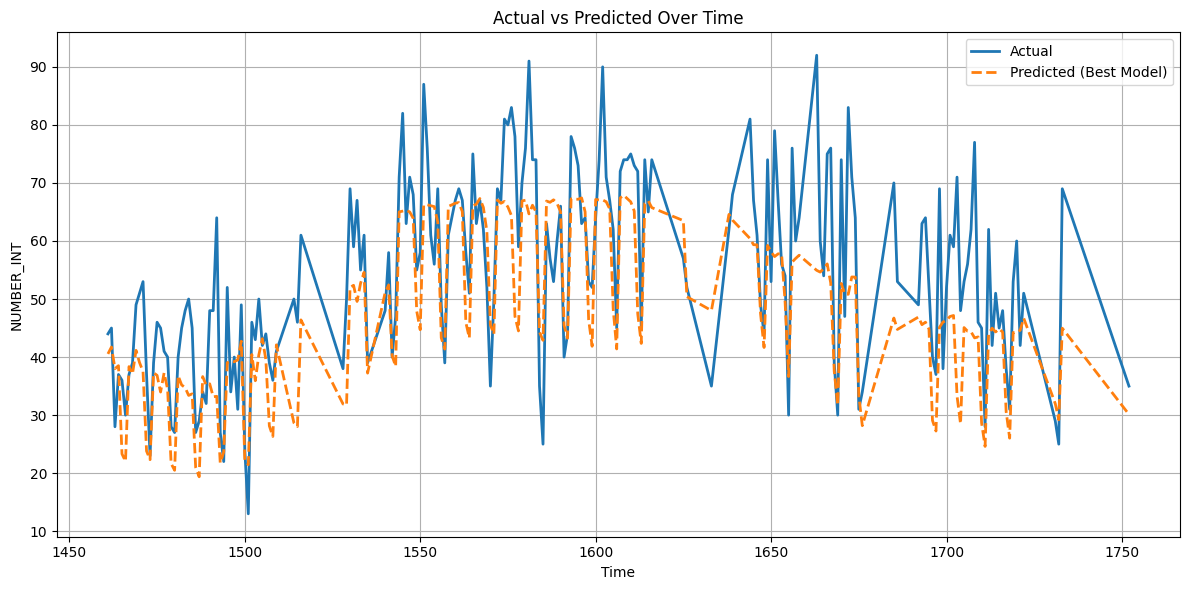

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 30d

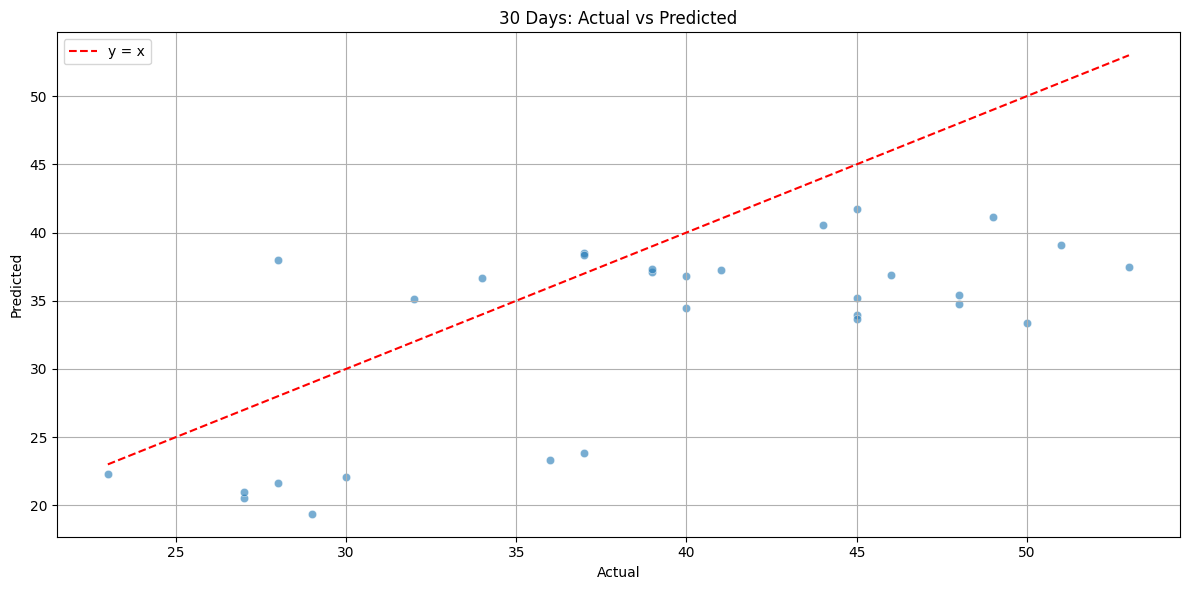

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:30], y=y_pred_best[:30], alpha=0.6)
plt.plot([y_val[:30].min(), y_val[:30].max()], [y_val[:30].min(), y_val[:30].max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('30 Days: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


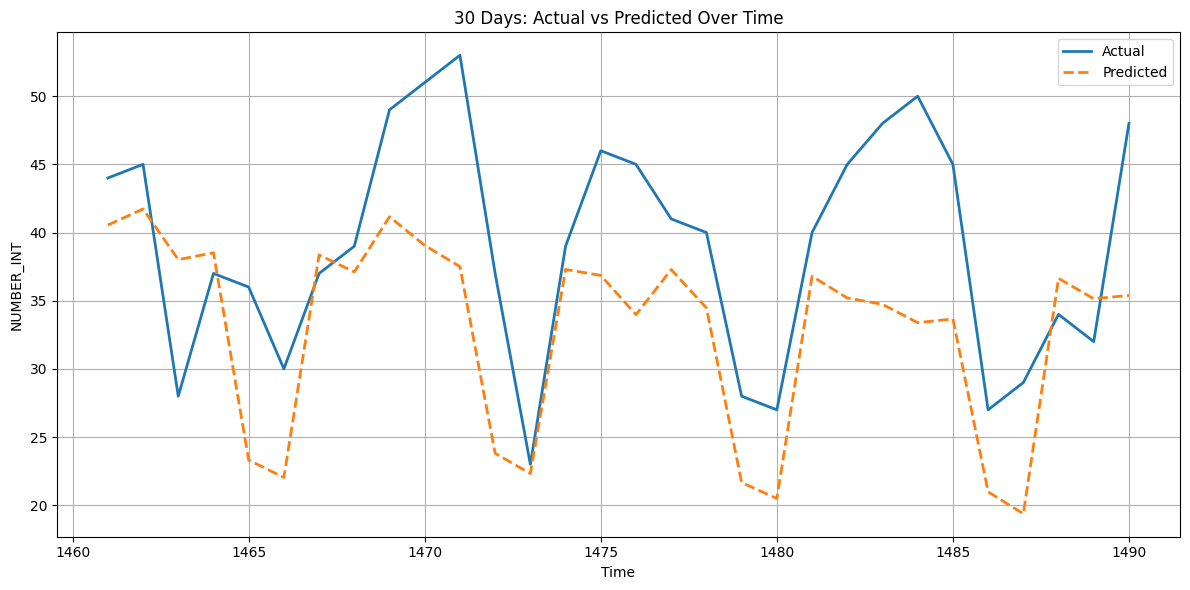

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index[:30], y_val[:30].values, label='Actual', linewidth=2)
plt.plot(y_val.index[:30], y_pred_best[:30], label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title('30 Days: Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

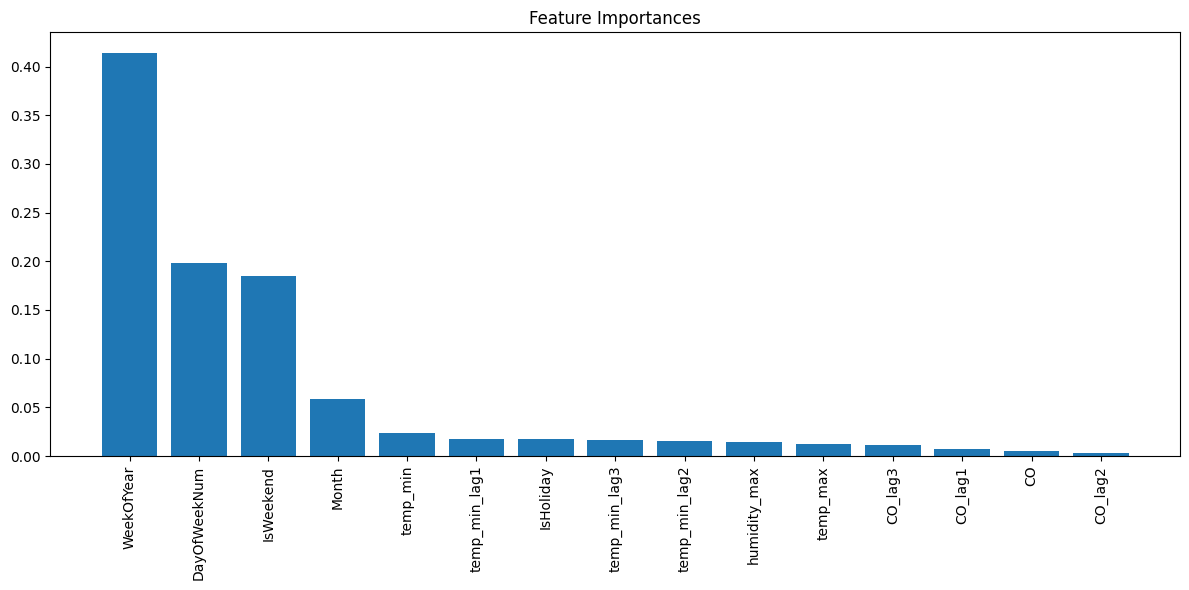

In [28]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()